# **Create A function that perfom EDA on both training and augmented  dataSet**

In [25]:
def visualize_dataset_distribution(dataset_dir, result_dir=None, data_type=None):
    """
    Given a dataset directory containing subfolders like:
        train/
            class1/
            class2/
        test/
            class1/
            class2/
        validation/ (optional)
            class1/
            class2/
    
    This function will automatically detect the splits and visualize
    the class distribution in each subset.
    
    Parameters:
    - dataset_dir: Path to the dataset directory
    - result_dir: Directory to save the visualization (optional)
    - data_type: Dataset type identifier for filename (e.g., 'original', 'preprocessed') (optional)
    """
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    def count_files(directory):
        """Count number of images in each class folder."""
        if directory is None or not os.path.isdir(directory):
            return {}
        counts = {}
        for class_name in sorted(os.listdir(directory)):
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):
                counts[class_name] = len(os.listdir(class_path))
        return counts

    # Detect splits
    splits = {}
    for split_name in ["train", "test", "validation", "val"]:
        split_path = os.path.join(dataset_dir, split_name)
        if os.path.isdir(split_path):
            splits[split_name] = split_path

    if not splits:
        print(f"No train/test/validation folders found inside {dataset_dir}")
        return

    # Collect counts
    all_classes = set()
    data = []
    for split_name, split_path in splits.items():
        counts = count_files(split_path)
        all_classes.update(counts.keys())
        for cls, cnt in counts.items():
            data.append({"Class": cls, "Count": cnt, "Set": split_name.capitalize()})

    # Fill missing classes with zero counts
    for split_name in splits.keys():
        for cls in all_classes:
            if not any(d["Class"] == cls and d["Set"] == split_name.capitalize() for d in data):
                data.append({"Class": cls, "Count": 0, "Set": split_name.capitalize()})

    # Create DataFrame
    df = pd.DataFrame(data)

    # Plot
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(x="Class", y="Count", hue="Set", data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title("Dataset Class Distribution by Split")
    plt.ylabel("Number of Images")
    plt.xlabel("Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save plot if result_dir is provided
    if result_dir is not None:
        # Create result directory if it doesn't exist
        os.makedirs(result_dir, exist_ok=True)
        
        # Generate filename components
        splits_str = "_".join(sorted(splits.keys()))
        data_type_str = f"_{data_type}" if data_type else ""
        filename = f"{splits_str}_distribution{data_type_str}.png"
        save_path = os.path.join(result_dir, filename)
        
        # Save the plot
        plt.savefig(save_path)
        print(f"Visualization saved to: {save_path}")
    
    plt.show()

Visualization saved to: C:\Users\PMYLS\Pictures\Documents\test_train_distribution_origanl data.png


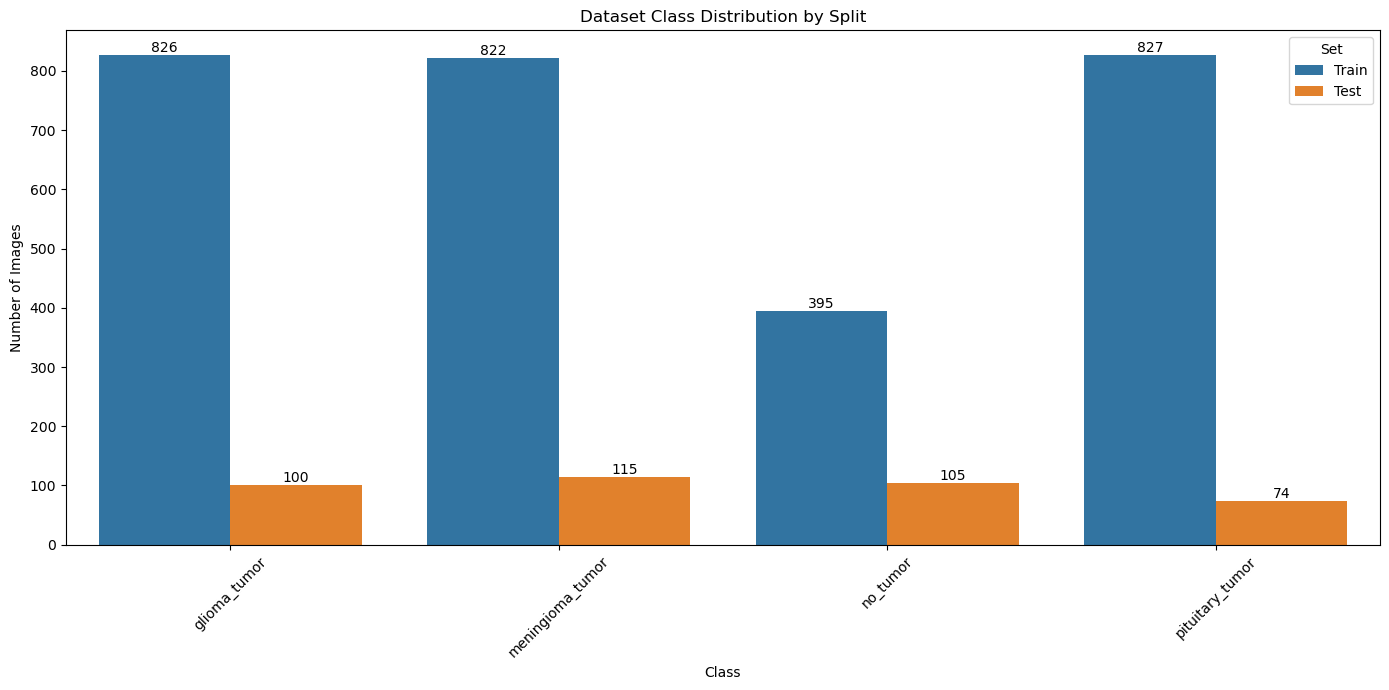

In [26]:
orignal_data = r"C:\Users\PMYLS\Pictures\Documents\Brain Tumor Classification\dataset\MRI_Orignal Data"
visualize_dataset_distribution(orignal_data,result_dir=r"C:\Users\PMYLS\Pictures\Documents",data_type  ='origanl data')

Visualization saved to: C:\Users\PMYLS\Pictures\Documents\test_train_validation_distribution_preprocess.png


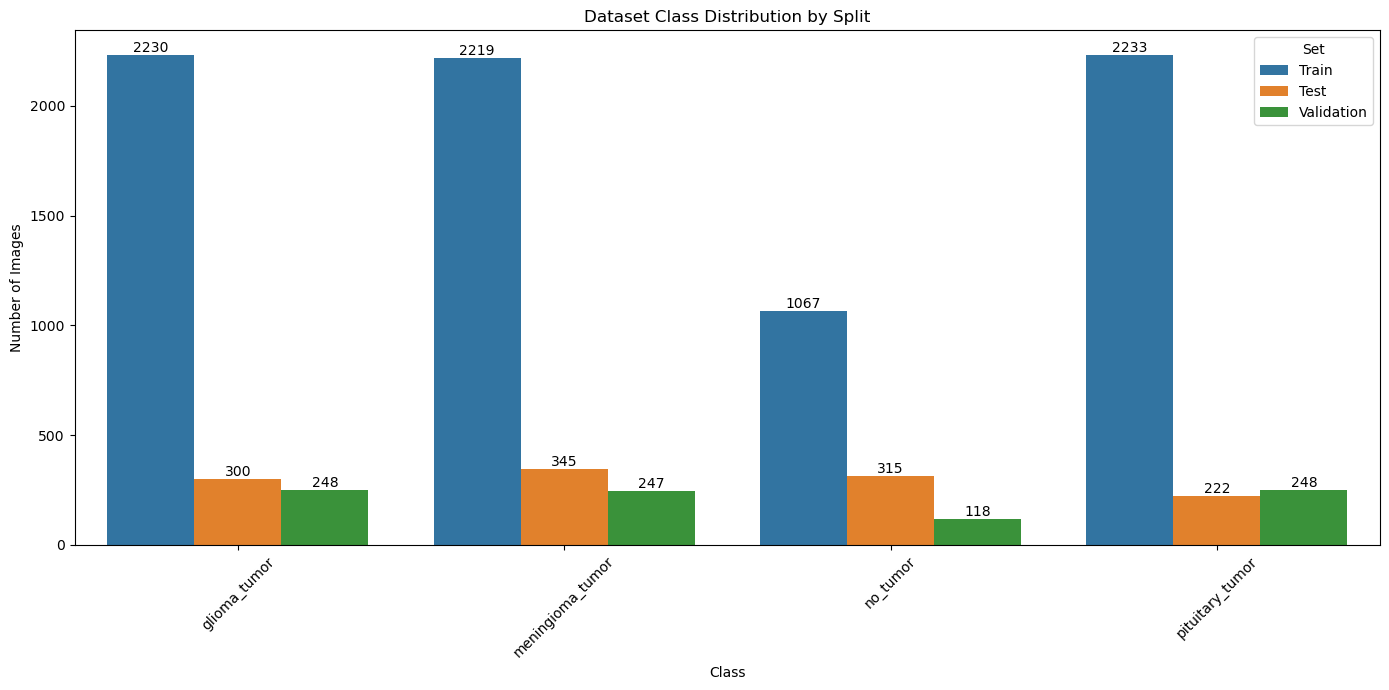

In [27]:
preprocess_data = r"F:\Rough preprocess image"
visualize_dataset_distribution(preprocess_data,result_dir=r"C:\Users\PMYLS\Pictures\Documents",data_type ='preprocess')